In [1]:
import pandas as pd 
import webbrowser 
import matplotlib.pyplot as plt

url = "./data/museum.json"
df = pd.read_json(url,encoding="utf8")          #讀取json檔案

In [2]:
#抓取所需欄位
df = df[["name","type","address","ticketPrice","openTime","phone",
         "cityName","website"]]   
df["type"] = df["type"].fillna("未分類")       #將type欄位為""填入"未分類"
#各列的縣市名(含區域)     #台北市 內湖區
l = len(df["cityName"])
cityNameLst=[0]*l
for i in range(l):
    cityNameLst[i] = list(df["cityName"][i])   #'台','北','市','內','湖','區'
#各列的縣市(不含區域)    #台北市
city = [0]*l
for i in range(l): 
    if cityNameLst[i] == []:
        city[i] = "未提供"
    else:
        city[i] = cityNameLst[i][0]+cityNameLst[i][1]+cityNameLst[i][2] #台北市
df["cityName"] = city       #將city串列作為cityName的欄位資料

dfGroupCity = df.groupby("cityName")         #以cityName欄位來群組資料
cityNum = dfGroupCity["cityName"].count()    #計算各城市出現次數(Series)
cityLst = list(cityNum.index)                #各城市名稱 

dfGroupType = df.groupby("type")             #以type欄位來群組資料
typeNum = dfGroupType["type"].count()        #計算各種類出現次數(Series)
typeLst = list(typeNum.index)                #各種類名稱 

In [3]:
def menu():
    print("1.選擇欲查詢的縣市:")
    print("2.選擇欲查詢的類別:")
    print("3.所有列表:")  
    print("4.統計圖表:")
    print("0.返回總目錄")

In [4]:
# ---------------------choice=1------------------------
def menuCity1():
    print("------------請按0返回前一頁-------------")
    for i in range(len(cityLst)):
        print("{:}.{:}".format(i+1,cityLst[i]),end="")
        if (i+1) % 5 == 0:
            print("\n")  
    print()
def menuType1():
    print("------------請按0返回前一頁-------------")
    for i in range(len(typeLst1)):
        print("{}.{}".format(i+1,typeLst1[i]))
def menuName1():
    print("------------請按0返回前一頁-------------")   
    for i in range(len(nameLst1)):
        print("{}.{}".format(i+1,nameLst1[i]))  

In [5]:
# -------------------- choice=2 -----------------------     
def menuType2():
    print("------------請按0返回前一頁-------------")
    for i in range(len(typeLst)):
        print("{:}.{:}".format(i+1,typeLst[i]))    
def menuCity2():
    print("------------請按0返回前一頁-------------")
    for i in range(len(cityLst2)):
        print("{:}.{:}".format(i+1,cityLst2[i]),end="")
        if (i+1) % 5 == 0:
            print("\n") 
    print()
def menuName2():
    print("------------請按0返回前一頁-------------")   
    for i in range(len(nameLst2)):
        print("{}.{}".format(i+1,nameLst2[i]))      

In [7]:
# -------------------- 視覺化 -------------------------   
def menuPlt():
    print("------------請按0返回前一頁-------------") 
    print("1.全台各縣市博物館比例:")
    print("2.全台各類別博物館比例:")
def pltCityMusNum():
    plt.figure(figsize=(15,15))
    patch,ltext,ptext = plt.pie(cityNum,labels=cityLst,autopct="%2.1f%%")
    plt.title("全台各縣市博物館比例",size=20)
    for t in ltext:
        t.set_size(26)  #外圍文字
    for p in ptext:
        p.set_size(18)  #內部文字
def pltMusTypeNum():
    plt.figure(figsize=(15,15))
    colors = ['aqua','chocolate','darkgreen','b','brown','chartreuse']
    explode = [0.01]*6
    patch,ltext,ptext = plt.pie(typeNum,labels=typeLst,autopct="%2.1f%%",colors=colors,explode=explode)
    plt.title("全台各類別博物館比例",size=20)
    for t in ltext:
        t.set_size(18) 
    for p in ptext:
        p.set_size(18)

In [8]:
# -------------------- main program -------------------  
def main():        
    while True:
        try:
            print("---全台公私立博物館資訊---")
            menu()
            choice = int(input("請選擇欲查詢項目:"))    #choice選擇查詢項目(int)
            print()
            if choice == 1:         #選擇查詢縣市
                while True:
                    try:
                        menuCity1()
                        choiceCity1 = int(input("請選擇欲查詢的縣市:"))         #選擇縣市 
                        print()
                        if choiceCity1 >=1 and choiceCity1 <=len(cityLst):
                            while True:  
                                try:
                                    filCity1 = (df["cityName"] == cityLst[choiceCity1-1])   #篩選出所選的縣市
                                    global typeLst1
                                    typeLst1 = list(set(df[filCity1]["type"]))              #所選縣市的所有類別
                                    menuType1()
                                    choiceType1 = int(input("請選擇欲查詢類別:"))             #選擇所選縣市的所有類別
                                    print()
                                    if choiceType1 >=1 and choiceType1 <= len(typeLst1):
                                        while True: 
                                            try:
                                                filType1 = (df["type"] == typeLst1[choiceType1-1])          #篩選出所選縣市所選的類別
                                                global nameLst1
                                                nameLst1 = list(set(df[filType1 & filCity1]["name"]))       #所選縣市所選類別的所有博物館名
                                                menuName1()
                                                choiceName1 = int(input("請選擇欲查詢的博物館相關資訊:"))      #選擇所選縣市所選類別的博物館名
                                                print()
                                                if choiceName1 >=1 and choiceName1 <= len(nameLst1):
                                                    while True:
                                                        filInfo1 = (df["name"] == nameLst1[choiceName1-1])  #篩選出所選縣市所選類別所選的博物館名
                                                        print("{}的相關資訊:".format(list(df[filInfo1]["name"])[0]))
                                                        print("地址:",list(df[filInfo1]["address"])[0])
                                                        print("票價:",list(df[filInfo1]["ticketPrice"])[0])
                                                        print("營業時間:",list(df[filInfo1]["openTime"])[0])
                                                        print("電話:",list(df[filInfo1]["phone"])[0])
                                                        print("網站:",list(df[filInfo1]["website"])[0])
                                                        m = input("按0返回前一頁(輸入i可開啟網站)\n")
                                                        if m == 'i':
                                                            webbrowser.open(list(df[filInfo1]["website"])[0])   #開啟網頁 
                                                        elif m == "0":
                                                            print("")
                                                            break
                                                        else:
                                                            print("請按0返回前一頁")
                                                elif choiceName1 == 0:
                                                    print("")
                                                    break
                                                else:
                                                    print("請輸入1~{}! 請按任意鍵繼續..".format(len(nameLst1)))
                                                    input("") 
                                            except ValueError:
                                                print("\n請輸入正確的選項! 按任意鍵繼續..")
                                                input("")                   
                                    elif choiceType1 == 0:
                                        print("")
                                        break
                                    else:
                                        print("請輸入1~{}! 請按任意鍵繼續..".format(len(typeLst1)))
                                        input("") 
                                except ValueError:
                                    print("\n請輸入正確的選項! 按任意鍵繼續..")
                                    input("") 
                        elif choiceCity1 == 0:
                            print("")
                            break
                        else:
                                print("請輸入1~{}! 請按任意鍵繼續..".format(len(cityLst)))
                                input("")  
                    except ValueError:
                        print("\n請輸入正確的選項! 按任意鍵繼續..")
                        input("") 
            elif choice == 2:       #選擇查詢類別
                while True:
                    try:
                        menuType2()
                        choiceType2 = int(input("請選擇欲查詢的類別:"))    #選擇類別
                        print()
                        if choiceType2 >=1 and choiceType2 <=len(typeLst):
                            while True: 
                                try:
                                    filType2 = (df["type"] == typeLst[choiceType2-1])   #篩選出所選的類別 
                                    global cityLst2
                                    cityLst2 = list(set(df[filType2]["cityName"]))      #所選類別的所有縣市
                                    menuCity2()
                                    choiceCity2 = int(input("請選擇欲查詢的縣市:"))       #選擇所選類別的所有縣市
                                    print()
                                    if choiceCity2 >=1 and choiceCity2 <= len(cityLst2):
                                        while True:
                                            try:
                                                filCity2 = (df["cityName"] == cityLst2[choiceCity2-1])   #篩選出所選類別所選的縣市
                                                global nameLst2
                                                nameLst2 = list(set(df[filType2 & filCity2]["name"]))    #所選類別所選縣市的所有博物館名
                                                menuName2()                  
                                                choiceName2 = int(input("請選擇欲查詢的博物館相關資訊:"))   #選擇所選類別所選縣市的博物館名
                                                print()
                                                if choiceName2 >=1 and choiceName2 <= len(nameLst2):
                                                    while True:
                                                        filInfo2 = (df["name"] == nameLst2[choiceName2-1])      #篩選出所選類別所選縣市所選的博物館名
                                                        print("{}的相關資訊:".format(list(df[filInfo2]["name"])[0]))
                                                        print("地址:",list(df[filInfo2]["address"])[0])
                                                        print("票價:",list(df[filInfo2]["ticketPrice"])[0])
                                                        print("營業時間:",list(df[filInfo2]["openTime"])[0])
                                                        print("電話:",list(df[filInfo2]["phone"])[0])
                                                        print("網站:",list(df[filInfo2]["website"])[0])
                                                        n = input("按0返回前一頁(輸入i可開啟網站)\n")
                                                        if n == 'i':
                                                            webbrowser.open(list(df[filInfo2]["website"])[0]) 
                                                        elif n == "0":
                                                            print("")
                                                            break
                                                        else:
                                                            print("請按0返回前一頁")
                                                elif choiceName2 == 0:
                                                    print("")
                                                    break
                                                else:
                                                    print("請輸入1~{}! 請按任意鍵繼續..".format(len(nameLst2)))
                                                    input("") 
                                            except ValueError:
                                                print("\n請輸入正確的選項! 按任意鍵繼續..")
                                                input("")                                                    
                                    elif choiceCity2 == 0:
                                        print("")
                                        break
                                    else:
                                        print("請輸入1~{}! 請按任意鍵繼續..".format(len(cityLst2)))
                                        input("") 
                                except ValueError:
                                    print("\n請輸入正確的選項! 按任意鍵繼續..")
                                    input("")                                 
                        elif choiceType2 == 0:
                            print("")
                            break
                        else:
                            print("請輸入1~{}! 請按任意鍵繼續..".format(len(typeLst)))
                            input("") 
                    except ValueError:
                        print("\n請輸入正確的選項! 按任意鍵繼續..")
                        input("") 
            elif choice == 3:
                while True:
                    try:
                        for i in range(l):
                            print("{:3d}.{:} {:>10s} {:>35s}".format(i+1,df["cityName"][i],df["type"][i],df["name"][i]))
                        choiceName3 = int(input("請選擇欲查詢的博物館相關資訊:"))   #選擇博物館名
                        print()
                        if choiceName3 >=1 and choiceName3 <= len(list(df["name"])):
                            while True:
                                print("{}的相關資訊:".format(list(df["name"])[choiceName3-1]))
                                print("地址:",list(df["address"])[choiceName3-1])
                                print("票價:",list(df["ticketPrice"])[choiceName3-1])
                                print("營業時間:",list(df["openTime"])[choiceName3-1])
                                print("電話:",list(df["phone"])[choiceName3-1])
                                print("網站:",list(df["website"])[choiceName3-1])
                                n = input("按0返回前一頁(輸入i可開啟網站)\n")
                                if n == "i":
                                    webbrowser.open(list(df["website"])[choiceName3-1]) 
                                elif n == "0":
                                    print("")
                                    break
                                else:
                                    print("按0返回前一頁(輸入i可開啟網站)\n")                                   
                        elif choiceName3 == 0:
                            break
                        else:
                            print("請輸入1~{}! 請按任意鍵繼續..".format(len(list(df["name"]))))
                            input("")    
                    except ValueError:
                        print("\n請輸入正確的選項! 按任意鍵繼續..")
                        input("")  
            elif choice == 4:  
                while True:
                    try:
                        menuPlt()
                        choicePlt = int(input("請選擇欲查詢的類別:"))    #選擇類別
                        print()
                        if choicePlt == 1:
                            while True:                                
                                pltCityMusNum()
                                plt.show()
                                input("請按任意鍵返回前一頁") 
                                break
                        elif choicePlt == 2:
                            while True:
                                pltMusTypeNum() 
                                plt.show()
                                input("請按任意鍵返回前一頁")   
                                break
                        elif choicePlt == 0:
                            print("")
                            break
                        else:
                            print("請輸入1或2! 請按任意鍵繼續..")
                            input("")  
                    except ValueError:
                        print("\n請輸入正確的選項! 按任意鍵繼續..")
                        input("")  
            elif choice == 0:
                print("返回總目錄\n")
                break
            else:
                print("請輸入1~4! 請按任意鍵繼續..")
                input("")
        except ValueError:
            print("\n請輸入正確的選項! 按任意鍵繼續..")
            input("")  

---全台公私立博物館資訊---
1.選擇欲查詢的縣市:
2.選擇欲查詢的類別:
3.所有列表:
4.統計圖表:
0.返回總目錄
請選擇欲查詢項目:4

------------請按0返回前一頁-------------
1.全台各縣市博物館比例:
2.全台各類別博物館比例:
請選擇欲查詢的類別:1



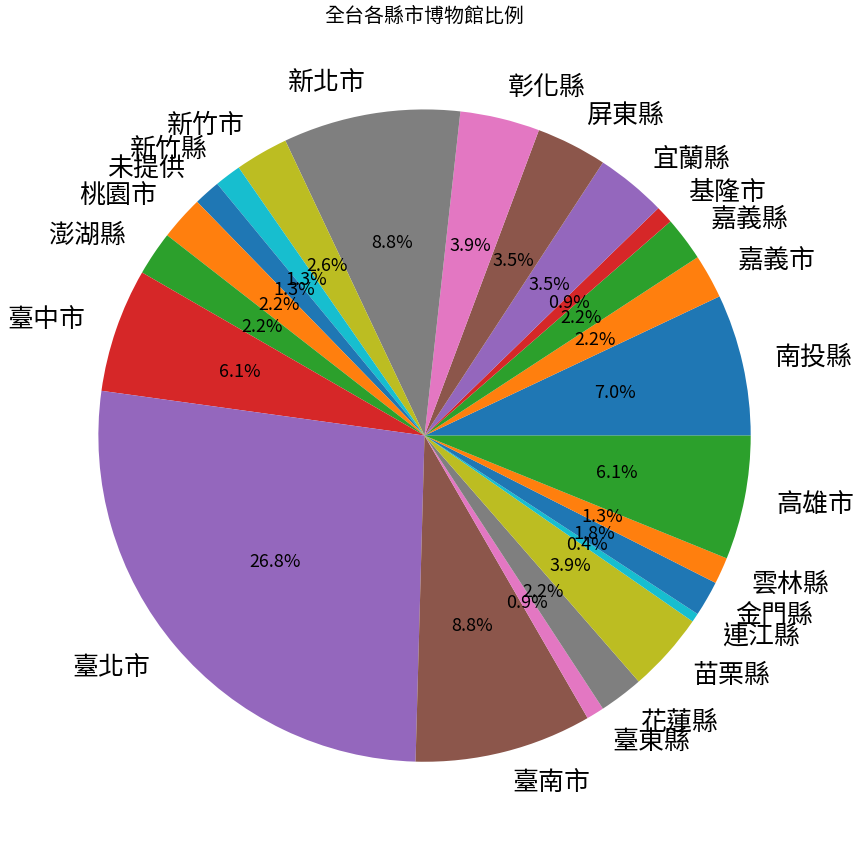

請按任意鍵返回前一頁0
------------請按0返回前一頁-------------
1.全台各縣市博物館比例:
2.全台各類別博物館比例:
請選擇欲查詢的類別:0


---全台公私立博物館資訊---
1.選擇欲查詢的縣市:
2.選擇欲查詢的類別:
3.所有列表:
4.統計圖表:
0.返回總目錄
請選擇欲查詢項目:0

返回總目錄



In [9]:
main()